In [130]:
# !pip install matplotlib 
!pip install nbformat>=4.2


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [37]:
df = pd.read_csv(r'D:\env\analysis\2194917.positions.csv' , delimiter=';')   


In [9]:
df

,Time,Type,Volume,Symbol,Price,Volume.1,Time.1,Price.1,Commission,Swap,Profit
0,2024.10.23 09:46:54,Sell,0.01,USDCAD,1.38234,0.01,2024.10.23 16:36:06,1.38347,NaN,NaN,-0.82
1,2024.10.22 17:12:01,Sell,0.01,USDCAD,1.38225,0.01,2024.10.22 17:15:02,1.38280,NaN,NaN,-0.40
2,2024.10.22 15:59:27,Sell,0.01,USDCAD,1.38273,0.01,2024.10.22 17:02:29,1.38260,NaN,NaN,0.09
3,2024.10.21 08:18:32,Sell,0.01,ETHUSD,2733.68000,0.01,2024.10.21 19:05:33,2677.50000,NaN,NaN,5.62
4,2024.10.18 21:00:31,Sell,0.01,USDCAD,1.38031,0.01,2024.10.21 01:11:18,1.38035,NaN,NaN,-0.03
...,...,...,...,...,...,...,...,...,...,...,...
1015,2023.07.10 10:16:49,Buy,0.02,NZDUSD,0.61852,0.02,2023.07.10 16:55:21,0.61915,NaN,NaN,1.26
1016,2023.07.10 10:15:44,Buy,0.02,AUDUSD,0.66509,0.02,2023.07.10 16:55:18,0.66545,NaN,NaN,0.72
1017,2023.07.10 09:20:55,Buy,0.02,GBPUSD,1.28063,0.02,2023.07.10 09:55:01,1.28099,NaN,NaN,0.72
1018,2023.07.10 09:33:23,Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00


In [38]:
df = df[::-1].reset_index(drop=True)
df = df[(df['Type'] == 'Buy') | (df['Type'] == 'Sell') | (df['Type'] == 'Balance')].reset_index(drop=True)
if df['Profit'].dtypes != 'float64':
  df['Profit'] = df['Profit'].str.replace(' ' , '').astype(float)
if df['Commission'].dtypes != 'float64':
  df['Commission'] = df['Commission'].str.replace(' ' , '').astype(float)
if df['Price'].dtypes != 'float64':
  df['Price'] = df['Price'].str.replace(' ' , '').astype(float)
if df['Price.1'].dtypes != 'float64':
  df['Price.1'] = df['Price.1'].str.replace(' ' , '').astype(float)
df['Time'] = pd.to_datetime(df['Time'])
df['Time.1'] = pd.to_datetime(df['Time.1'])
if 'S/L' in df.columns:
  df.drop('S/L' , axis=1 , inplace=True)
if 'T/P' in df.columns:
  df.drop('T/P' , axis=1 , inplace=True)
if 'Swap' in df.columns:
  df.drop('Swap' , axis=1 , inplace=True)
if 'Comment' in df.columns:
  df.drop('Comment' , axis=1 , inplace=True)

if 'Volume.1' in df.columns:
  df.drop('Volume.1' , axis=1 , inplace=True)

df['Commission'].fillna(0 , inplace=True)
df['balance'] = (df['Profit'] + df['Commission']).cumsum()
df = df[df['Type'] != 'Balance'].reset_index(drop=True)


df['net_profit'] = df['Profit'] + df['Commission']

df['time_diff_minute'] = (df['Time.1'] - df['Time']).dt.total_seconds() / 60

df['Symbol'] = df['Symbol'].apply(lambda x : re.sub(r'[^A-Z0-9]', '', x))
df['Symbol_percent_trader'] = df.groupby('Symbol')['Symbol'].transform('count') / len(df) * 100

In [31]:
df.dtypes

Time                     datetime64[ns]
Type                             object
Volume                          float64
Symbol                           object
Price                           float64
Volume.1                        float64
Time.1                   datetime64[ns]
Price.1                         float64
Commission                      float64
Profit                          float64
balance                         float64
net_profit                      float64
time_diff_minute                float64
Symbol_percent_trader           float64
dtype: object

In [39]:
df.head(10)

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Profit,balance,net_profit,time_diff_minute,Symbol_percent_trader
0,2023-07-10 09:20:55,Buy,0.02,GBPUSD,1.28063,2023-07-10 09:55:01,1.28099,0.0,0.72,116.89,0.72,34.100000,7.370518
1,2023-07-10 10:15:44,Buy,0.02,AUDUSD,0.66509,2023-07-10 16:55:18,0.66545,0.0,0.72,117.61,0.72,399.566667,8.466135
2,2023-07-10 10:16:49,Buy,0.02,NZDUSD,0.61852,2023-07-10 16:55:21,0.61915,0.0,1.26,118.87,1.26,398.533333,11.354582
3,2023-07-10 12:53:57,Buy,0.01,AUDUSD,0.66362,2023-07-10 16:56:29,0.66569,0.0,2.07,120.94,2.07,242.533333,8.466135
4,2023-07-10 19:31:17,Sell,0.01,AUDCAD,0.88590,2023-07-10 19:37:36,0.88618,0.0,0.00,120.94,0.00,6.316667,0.199203
5,2023-07-10 19:35:30,Buy,0.01,AUDCAD,0.88618,2023-07-10 19:37:36,0.88590,0.0,-0.21,120.73,-0.21,2.100000,0.199203
6,2023-07-11 14:21:49,Buy,0.01,NZDUSD,0.61863,2023-07-11 14:48:19,0.61762,0.0,-1.01,119.72,-1.01,26.500000,11.354582
7,2023-07-11 12:10:57,Buy,0.01,NZDUSD,0.61868,2023-07-11 14:48:22,0.61764,0.0,-1.04,118.68,-1.04,157.416667,11.354582
8,2023-07-11 12:03:51,Buy,0.01,NZDUSD,0.61873,2023-07-11 14:48:25,0.61764,0.0,-1.09,117.59,-1.09,164.566667,11.354582
9,2023-07-11 14:01:35,Sell,0.01,GBPUSD,1.29149,2023-07-11 18:20:05,1.28967,0.0,1.82,119.41,1.82,258.500000,7.370518


In [50]:
dff = df.copy()

In [106]:
def calculate_pip_diff(row):
    symbol = row['Symbol']
    price_diff = abs(row['Price.1'] - row['Price'])
    
    # تعیین مقیاس پیپ بر اساس نماد

    if symbol == 'XAUUSD':  # طلا
        pip_scale = 10
    elif symbol in ['BTCUSD' , 'ETHUSD' , 'XTIUSD' , 'USDMXN']:  # بیت‌کوین
        pip_scale = 1  # بسته به نیاز می‌تواند تغییر کند
    elif symbol in ['WTI', 'Brent']:  # نفت خام
        pip_scale = 100  # چون نفت خام معمولاً دو رقم اعشار دارد
    elif symbol in ['S&P 500', 'DJIA', 'NASDAQ' , 'USDJPY']:  # شاخص‌های سهام
        pip_scale = 1  # شاخص‌ها معمولاً به صورت عدد صحیح نمایش داده می‌شوند
    else:
        pip_scale = 10000  # مقیاس پیش‌فرض برای نمادهای دیگر
    
    return price_diff * pip_scale



In [107]:
dff['pip_diff'] = dff.apply(calculate_pip_diff, axis=1)
dff['v/b'] =dff['Volume'] * 100_000 / dff['balance'] 
dff['percent_profit'] = dff['net_profit'] / dff['balance'] * 100

In [113]:
dff = dff[(dff['Symbol'] != 'BTCUSD') | (dff['Symbol'] != 'USDMXN')].reset_index(drop=True)

In [115]:
dff.head(20)

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Profit,balance,net_profit,time_diff_minute,Symbol_percent_trader,pip_diff,v/b,percent_profit
0,2023-07-10 09:20:55,Buy,0.02,GBPUSD,1.28063,2023-07-10 09:55:01,1.28099,0.0,0.72,116.89,0.72,34.100000,7.370518,3.600,17.110104,0.615964
1,2023-07-10 10:15:44,Buy,0.02,AUDUSD,0.66509,2023-07-10 16:55:18,0.66545,0.0,0.72,117.61,0.72,399.566667,8.466135,3.600,17.005357,0.612193
2,2023-07-10 10:16:49,Buy,0.02,NZDUSD,0.61852,2023-07-10 16:55:21,0.61915,0.0,1.26,118.87,1.26,398.533333,11.354582,6.300,16.825103,1.059981
3,2023-07-10 12:53:57,Buy,0.01,AUDUSD,0.66362,2023-07-10 16:56:29,0.66569,0.0,2.07,120.94,2.07,242.533333,8.466135,20.700,8.268563,1.711593
4,2023-07-10 19:31:17,Sell,0.01,AUDCAD,0.88590,2023-07-10 19:37:36,0.88618,0.0,0.00,120.94,0.00,6.316667,0.199203,2.800,8.268563,0.000000
5,2023-07-10 19:35:30,Buy,0.01,AUDCAD,0.88618,2023-07-10 19:37:36,0.88590,0.0,-0.21,120.73,-0.21,2.100000,0.199203,2.800,8.282945,-0.173942
6,2023-07-11 14:21:49,Buy,0.01,NZDUSD,0.61863,2023-07-11 14:48:19,0.61762,0.0,-1.01,119.72,-1.01,26.500000,11.354582,10.100,8.352823,-0.843635
7,2023-07-11 12:10:57,Buy,0.01,NZDUSD,0.61868,2023-07-11 14:48:22,0.61764,0.0,-1.04,118.68,-1.04,157.416667,11.354582,10.400,8.426020,-0.876306
8,2023-07-11 12:03:51,Buy,0.01,NZDUSD,0.61873,2023-07-11 14:48:25,0.61764,0.0,-1.09,117.59,-1.09,164.566667,11.354582,10.900,8.504125,-0.926950
9,2023-07-11 14:01:35,Sell,0.01,GBPUSD,1.29149,2023-07-11 18:20:05,1.28967,0.0,1.82,119.41,1.82,258.500000,7.370518,18.200,8.374508,1.524160


In [124]:
px.histogram(dff , x='time_diff_minute' , nbins=1000)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'time_diff_minute=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 1000,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([ 34.1       , 399.56666667, 398.53333333, ...,  63.03333333,
                            3.01666667, 409.2       ]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'time_diff_minute'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

<Axes: xlabel='Symbol,Type'>

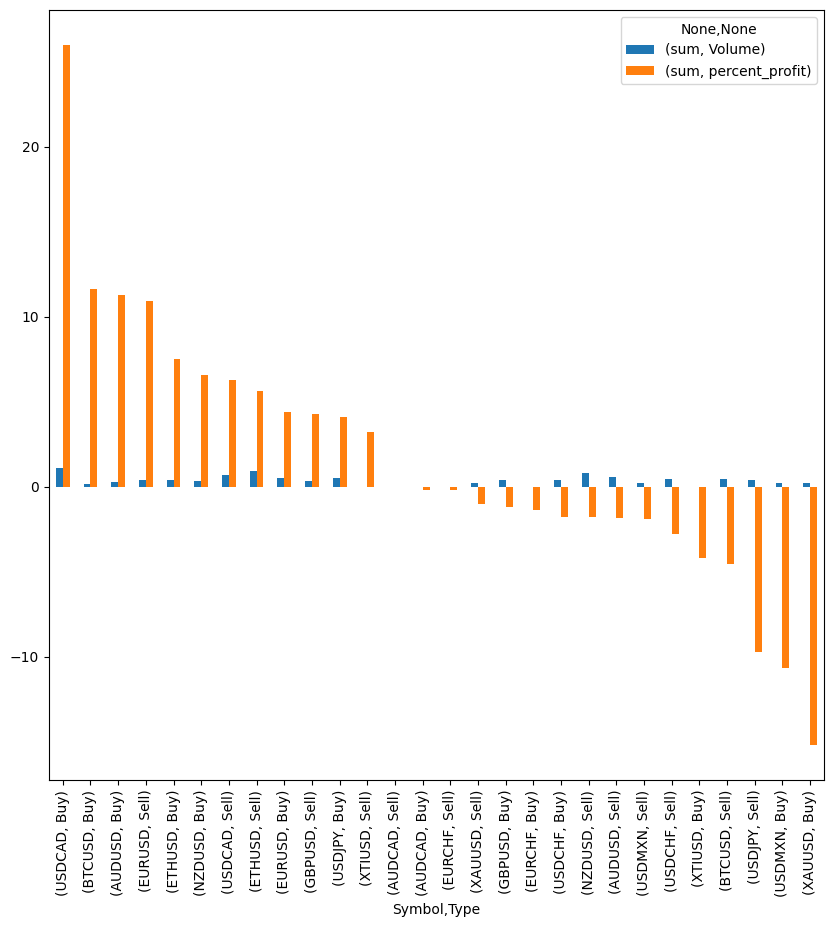

In [117]:
dff.pivot_table(index=['Symbol' , 'Type']  ,  values=['Volume' , 'percent_profit'  ] , aggfunc=['sum' ]).sort_values(by=('sum', 'percent_profit') , ascending=False).plot(kind='bar' , figsize=(10,10))


In [93]:
dff

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Profit,balance,net_profit,time_diff_minute,Symbol_percent_trader,pip_diff,v/b,percent_profit
0,2023-07-10 09:20:55,Buy,0.02,GBPUSD,1.28063,2023-07-10 09:55:01,1.28099,0.0,0.72,116.89,0.72,34.100000,7.370518,3.6,17.110104,0.615964
1,2023-07-10 10:15:44,Buy,0.02,AUDUSD,0.66509,2023-07-10 16:55:18,0.66545,0.0,0.72,117.61,0.72,399.566667,8.466135,3.6,17.005357,0.612193
2,2023-07-10 10:16:49,Buy,0.02,NZDUSD,0.61852,2023-07-10 16:55:21,0.61915,0.0,1.26,118.87,1.26,398.533333,11.354582,6.3,16.825103,1.059981
3,2023-07-10 12:53:57,Buy,0.01,AUDUSD,0.66362,2023-07-10 16:56:29,0.66569,0.0,2.07,120.94,2.07,242.533333,8.466135,20.7,8.268563,1.711593
4,2023-07-10 19:31:17,Sell,0.01,AUDCAD,0.88590,2023-07-10 19:37:36,0.88618,0.0,0.00,120.94,0.00,6.316667,0.199203,2.8,8.268563,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2024-10-18 21:00:31,Sell,0.01,USDCAD,1.38031,2024-10-21 01:11:18,1.38035,0.0,-0.03,200.53,-0.03,3130.783333,17.928287,0.4,4.986785,-0.014960
1000,2024-10-21 08:18:32,Sell,0.01,ETHUSD,2733.68000,2024-10-21 19:05:33,2677.50000,0.0,5.62,206.15,5.62,647.016667,12.848606,561800.0,4.850837,2.726170
1001,2024-10-22 15:59:27,Sell,0.01,USDCAD,1.38273,2024-10-22 17:02:29,1.38260,0.0,0.09,206.24,0.09,63.033333,17.928287,1.3,4.848720,0.043638
1002,2024-10-22 17:12:01,Sell,0.01,USDCAD,1.38225,2024-10-22 17:15:02,1.38280,0.0,-0.40,205.84,-0.40,3.016667,17.928287,5.5,4.858142,-0.194326


In [118]:
dff.pivot_table(index=['Symbol' , 'Type']  ,  values=['Volume' , 'percent_profit' , 'pip_diff' ] , aggfunc=['sum' ]).sort_values(by=('sum', 'percent_profit') , ascending=False)



sum                           
            Volume percent_profit    pip_diff
Symbol Type                                  
USDCAD Buy    1.13      25.976554  2077.40000
BTCUSD Buy    0.18      11.644823   402.53600
AUDUSD Buy    0.28      11.271452   458.10000
EURUSD Sell   0.37      10.896299   616.00000
ETHUSD Buy    0.39       7.516931    84.69600
NZDUSD Buy    0.36       6.576462   532.00000
USDCAD Sell   0.67       6.269123  1121.10000
ETHUSD Sell   0.90       5.658045   209.24200
EURUSD Buy    0.51       4.396889   580.00000
GBPUSD Sell   0.35       4.292188   608.10000
USDJPY Buy    0.50       4.129421    14.65700
XTIUSD Sell   0.01       3.220365     0.08400
AUDCAD Sell   0.01       0.000000     2.80000
       Buy    0.01      -0.173942     2.80000
EURCHF Sell   0.01      -0.189616     1.80000
XAUUSD Sell   0.21      -1.019523   341.00000
GBPUSD Buy    0.40      -1.206351   715.30000
EURCHF Buy    0.01      -1.353169    14.10000
USDCHF Buy    0.38      -1.777872   602.20000
NZDUSD Sell   0.79      -1.799276   914.40000
AUDUSD Sell   0.58      -1.808987   784.40000
USDMXN Sell   0.20      -1.919725     0.09280
USDCHF Sell   0.45      -2.747643   535.90000
XTIUSD Buy    0.01      -4.168856     0.11900
BTCUSD Sell   0.46      -4.550000  2370.07900
USDJPY Sell   0.41      -9.686914     9.47700
USDMXN Buy    0.25     -10.635451     0.08676
XAUUSD Buy    0.25     -15.180668  1266.20000

In [132]:
df_test = dff[dff['Symbol'] == 'XAUUSD'].reset_index(drop=True)
px.line(df_test , x='Time' , y='Profit' )


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Time=%{x}<br>Profit=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 7, 14, 9, 25),
                          datetime.datetime(2023, 7, 14, 15, 10, 57),
                          datetime.datetime(2023, 7, 17, 8, 35),
                          datetime.datetime(2023, 7, 18, 14, 26, 19),
                          datetime.datetime(2023, 7, 18, 14, 56, 15),
                          datetime.datetime(2023, 7, 18, 15, 30),
                          datetime.datetime(2023, 7, 18, 15, 31, 37),
                          datetime.datetime(2023, 7, 18, 15, 44, 22),
                          datetime.datetime(2023, 7, 18, 15, 53, 32),
                          datetime.datetime(2023, 7, 18, 18, 1, 56),
                          datetime.datetime(2023, 7, 18, 18, 10, 30),
                          datetime.datetime(2023, 7, 18, 21, 21, 18),
                          datetime.datetime(2023, 7, 19, 10, 15, 45),
                          datetime.datetime(2023, 7, 19, 14, 4, 13),
                          datetime.datetime(2023, 7, 19, 14, 17, 35),
                          datetime.datetime(2023, 7, 19, 17, 0, 21),
                          datetime.datetime(2023, 7, 20, 11, 28, 55),
                          datetime.datetime(2023, 7, 20, 14, 23, 23),
                          datetime.datetime(2023, 7, 20, 15, 15, 20),
                          datetime.datetime(2023, 7, 20, 16, 1, 39),
                          datetime.datetime(2023, 7, 21, 11, 24, 42),
                          datetime.datetime(2023, 8, 2, 13, 43, 5),
                          datetime.datetime(2023, 8, 3, 10, 28, 9),
                          datetime.datetime(2023, 8, 3, 15, 12, 48),
                          datetime.datetime(2023, 8, 4, 9, 14, 12),
                          datetime.datetime(2023, 8, 4, 13, 41, 20),
                          datetime.datetime(2023, 8, 4, 16, 17, 31),
                          datetime.datetime(2023, 9, 4, 11, 9, 2),
                          datetime.datetime(2023, 9, 4, 11, 9, 2),
                          datetime.datetime(2023, 11, 13, 18, 4, 23),
                          datetime.datetime(2023, 12, 12, 12, 52, 40),
                          datetime.datetime(2023, 12, 13, 19, 51, 21),
                          datetime.datetime(2023, 12, 5, 2, 24, 43),
                          datetime.datetime(2024, 1, 4, 15, 28, 15),
                          datetime.datetime(2024, 1, 4, 16, 18, 50),
                          datetime.datetime(2024, 1, 5, 6, 59),
                          datetime.datetime(2024, 1, 8, 9, 48, 42),
                          datetime.datetime(2024, 1, 12, 17, 32, 42),
                          datetime.datetime(2024, 1, 17, 9, 37, 17),
                          datetime.datetime(2024, 1, 17, 16, 49, 47),
                          datetime.datetime(2024, 1, 29, 19, 50, 7),
                          datetime.datetime(2024, 2, 1, 11, 25, 29),
                          datetime.datetime(2024, 2, 13, 22, 50, 21),
                          datetime.datetime(2024, 2, 13, 2, 58, 7),
                          datetime.datetime(2024, 2, 23, 9, 32, 10),
                          datetime.datetime(2024, 2, 28, 12, 44, 13)], dtype=object),
              'xaxis': 'x',
              'y': array([  2.  ,   2.36,   3.01,   0.62,  -2.05,  -1.88,   4.  ,  -8.34,  -1.65,
                            0.12,   0.47,  -0.51,  -0.81,  -2.99,  -0.08,   1.79,   0.47,  -4.69,
                           -4.45,  -3.77,   1.2 ,   1.13,   1.7 ,  -3.81,   0.44,   0.07,   0.27,
                           -0.3 ,  -0.16,  18.54,   0.05,  14.56, -22.35,  -3.19,   0.87,   0.84,
          